In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (64, 64, 3)
img_width = 64
img_height = 64

nb_train_samples = 48
nb_validation_samples = 48
batch_size = 16
epochs = 10

train_data_dir = '/content/drive/MyDrive/Asia/train'
validation_data_dir = '/content/drive/MyDrive/Asia/test'

# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(48))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 400, activation = 'relu'))
model.add(Dense(units = 350, activation = 'relu'))
model.add(Dense(units = 300, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 48, activation = 'relu'))
#model.add(Dense(units = 32, activation = 'relu'))
#model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dense(units = 8, activation = 'relu'))
#model.add(Dense(units = 4, activation = 'relu'))
#model.add(Dense(units = 2, activation = 'relu'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        rotation_range = 30,
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 48 images belonging to 48 classes.
Found 48 images belonging to 48 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
________________________________________

In [2]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 48,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 48)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 40s 40s/step - loss: 9.9026 - accuracy: 0.0000e+00 - val_loss: 10.6782 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 8.2726 - accuracy: 0.0625 - val_loss: 9.9988 - val_accuracy: 0.0625
Epoch 3/10
1/1 [==============================] - 1s 760ms/step - loss: 8.4320 - accuracy: 0.0625 - val_loss: 7.8732 - val_accuracy: 0.0625
Epoch 4/10
1/1 [==============================] - 0s 276ms/step - loss: 8.9010 - accuracy: 0.0000e+00 - val_loss: 11.3079 - val_accuracy: 0.0625
Epoch 5/10
1/1 [==============================] - 0s 148ms/step - loss: 8.6767 - accuracy: 0.0625 - val_loss: 11.8963 - val_accuracy: 0.0625
Epoch 6/10
1/1 [==============================] - 0s 151ms/step - loss: 11.0634 - accuracy: 0.0625 - val_loss: 11.1407 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 151ms/step - loss: 9.4193 - accuracy: 0.0625 - val_loss: 11.1182 - val_accuracy: 0.0625
Ep

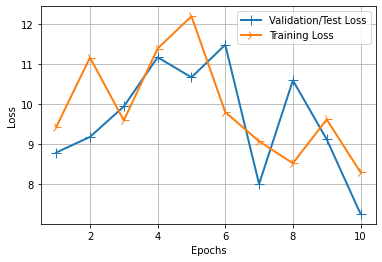

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

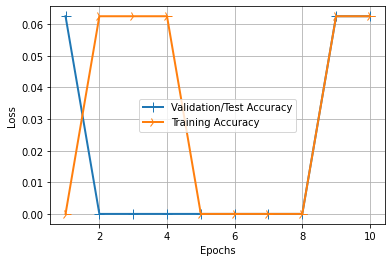

In [ ]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("asian_flags_classification.h5")

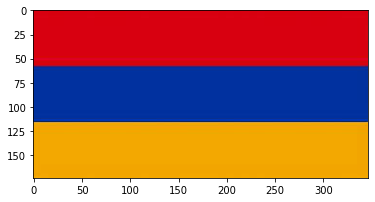

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

input_image_path = '/content/drive/MyDrive/Asia/test/Armenia/OIP.jpg'

# Show our input Image for Feature visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);

img_size = (64, 64)
# load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)

In [ ]:
from keras import models

# Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(image_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 64)


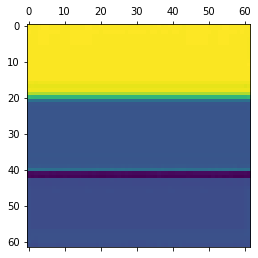

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

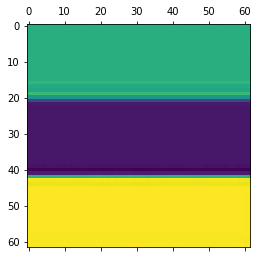

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


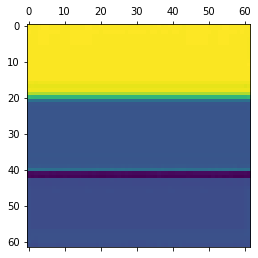

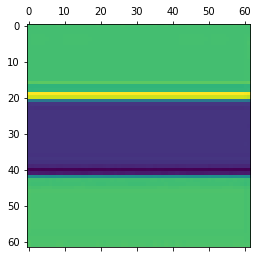

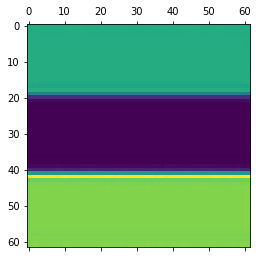

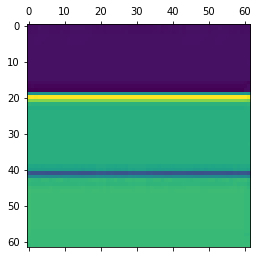

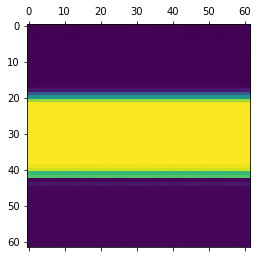

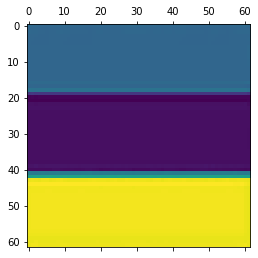

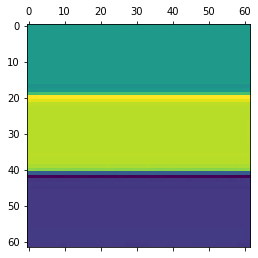

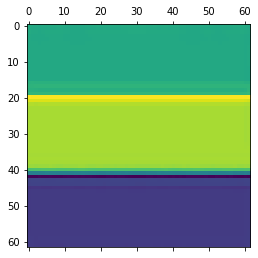

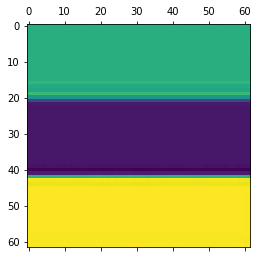

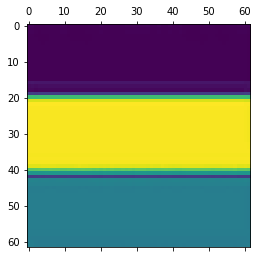

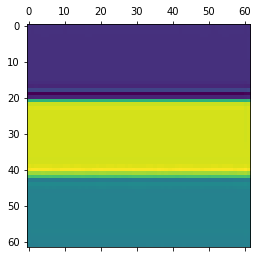

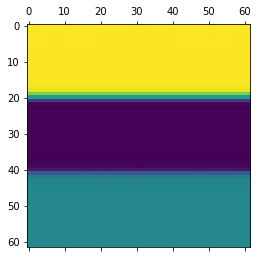

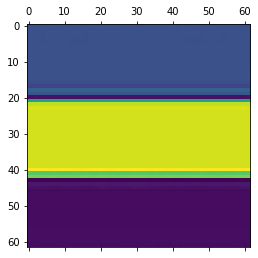

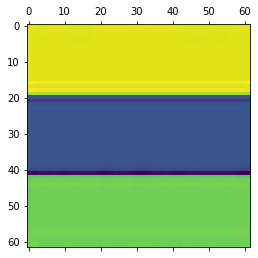

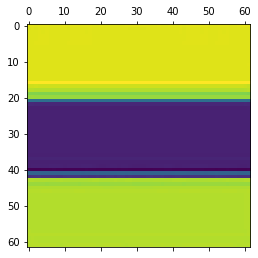

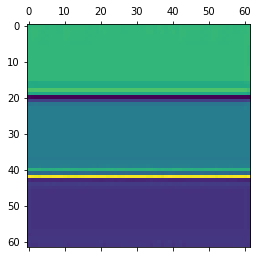

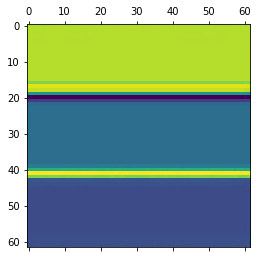

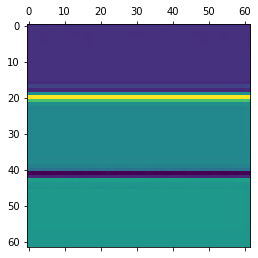

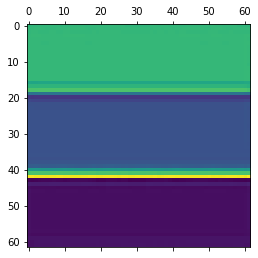

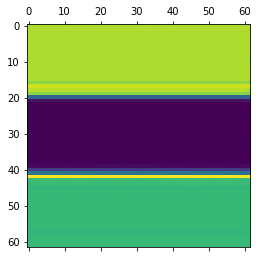

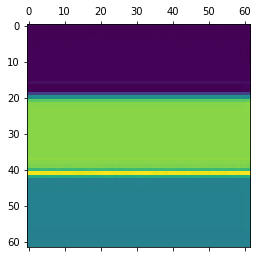

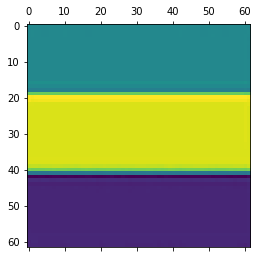

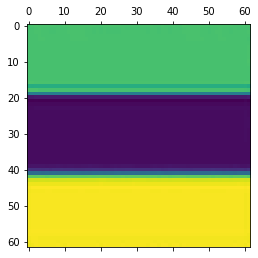

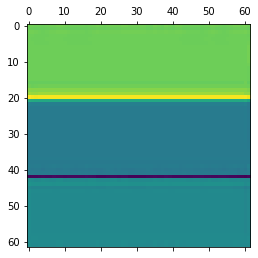

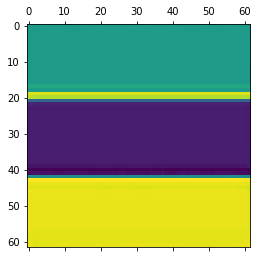

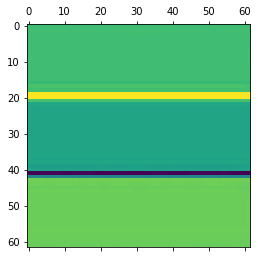

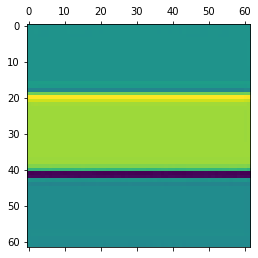

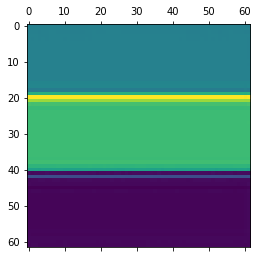

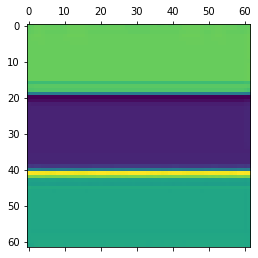

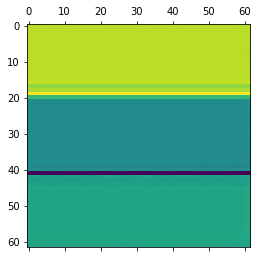

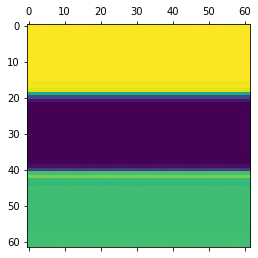

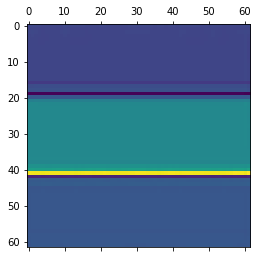

In [ ]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0, :, :,i], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


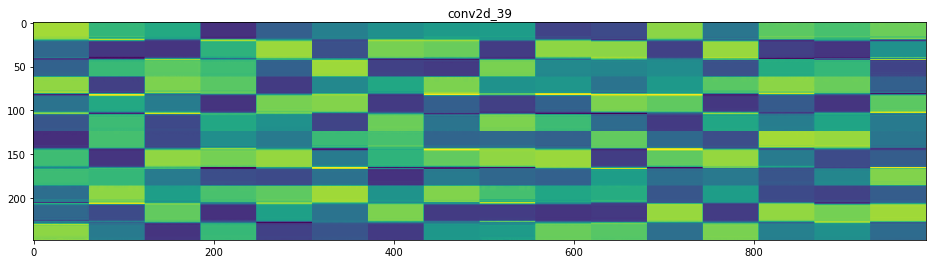

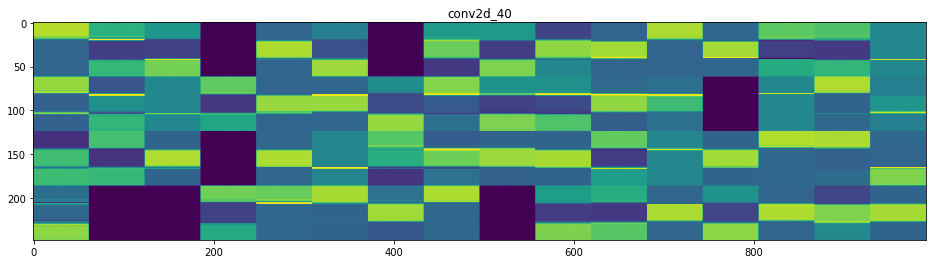

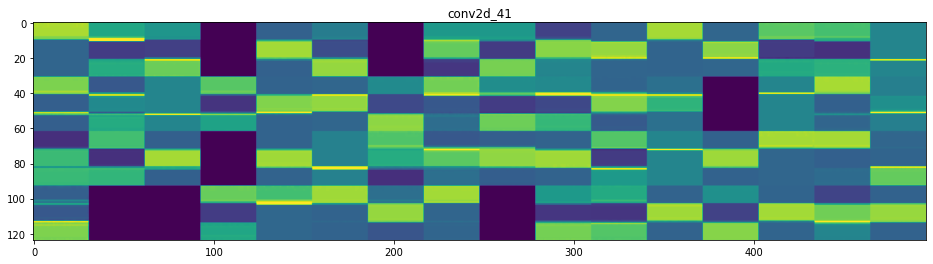

In [ ]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 16

# Get CONV layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')